In [2]:
import numpy as np
import pandas as pd
import sympy as sy
import matplotlib.pyplot as plt

**PUNTO 1**

In [3]:
X=np.array([205,210,215])
Y=np.array([1724.3,1907.7,2105.9])
x=sy.symbols('x')

def L0(x,X):
  return (x-X[1])*(x-X[2])/((X[0]-X[1])*(X[0]-X[2]))

def L1(x,X):
  return (x-X[0])*(x-X[2])/((X[1]-X[0])*(X[1]-X[2]))

def L2(x,X):
  return (x-X[0])*(x-X[1])/((X[2]-X[0])*(X[2]-X[1]))

def polinomio(x,X,Y):
  return Y[0]*L0(x,X) + Y[1]*L1(x,X) + Y[2]*L2(x,X)
      
print(polinomio(x,X,Y))
print(sy.expand(polinomio(x,X,Y)))

34.486*(x - 215)*(x - 210) - 76.308*(x - 215)*(x - 205) + 42.118*(x - 210)*(x - 205)
0.295999999999992*x**2 - 86.1599999999962*x + 6947.69999999972


**PUNTO 2**

In [4]:
#Método generalizado de calcular los coeficientes Li,
def Li(n,i,x,X):
  rta=1
  for j in range(n):
    if(i!=j):
      rta = rta*(x-X[j])/(X[i]-X[j])
  return rta

#Método generalizado de calcular el polinomio de Lagrange.
def pol(n,x,X,Y):
  rta=0;
  for j in range(n):
    rta += Y[j]*Li(n,j,x,X)
  return rta

In [6]:
datos=pd.read_csv("datos.csv",delimiter=";",header=None, names=["T","P","vf","vg","uf","ufg","ug","hf","hfg","hg","sf","sfg","sg"])
print(datos)

filas = len(datos.axes[0])

T=datos['T'].values
P=datos['P'].values

#Almacena los datos en y de la interpolación en una lista que entra por parámetro, usando el polinomio de Lagrange.
def polarizacion_y(n,X,Y,Z):
  for i in range(n):
    Z[i] = pol(n,X[i],X,Y)

polarizacionP = np.zeros(filas)
polarizacion_y(filas,T,P,polarizacionP)
print("Polarizacion P")
tablaPT=[T,polarizacionP]
print(tablaPT)

         T         P        vf          vg        uf     ufg      ug  \
0     0.01   0.61170  0.001000  206.000000     0.000  2374.9  2374.9   
1     5.00   0.87125  0.001000  147.030000    21.019  2360.8  2381.8   
2    10.00  12.28100  0.001000  106.320000    42.020  2346.6  2388.7   
3    15.00  17.05700  0.001001   77.885000    62.980  2332.5  2395.5   
4    20.00  23.39200  0.001002   57.762000    83.913  2318.4  2402.3   
..     ...       ...       ...         ...       ...     ...     ...   
71  355.00  17.57000  0.001808    0.007872  1682.200   706.4  2388.6   
72  360.00  18.66600  0.001895    0.006950  1726.200   625.7  2351.9   
73  365.00  19.82200  0.002015    0.006009  1777.200   526.4  2303.6   
74  370.00  21.04400  0.002217    0.004953  1844.500   385.6  2230.1   
75  373.95  22.06400  0.003106    0.003106  2015.700     0.0  2015.7   

          hf     hfg      hg       sf      sfg      sg  
0      0.001  2500.9  2500.9   0.0000  91.5560  91.556  
1     21.020  2489.1 

**PUNTO 3**

In [16]:
sg=datos['sg'].values

polarizacionSg = np.zeros(filas)
polarizacion_y(filas,T,sg,polarizacionSg)
print("Polarizacion sg")
tablaSgT=[T,polarizacionSg]
print(tablaSgT)


Polarizacion sg
[array([1.0000e-02, 5.0000e+00, 1.0000e+01, 1.5000e+01, 2.0000e+01,
       2.5000e+01, 3.0000e+01, 3.5000e+01, 4.0000e+01, 4.5000e+01,
       5.0000e+01, 5.5000e+01, 6.0000e+01, 6.5000e+01, 7.0000e+01,
       7.5000e+01, 8.0000e+01, 8.5000e+01, 9.0000e+01, 9.5000e+01,
       1.0000e+02, 1.0500e+02, 1.1000e+02, 1.1500e+02, 1.2000e+02,
       1.2500e+02, 1.3000e+02, 1.3500e+02, 1.4000e+02, 1.4500e+02,
       1.5000e+02, 1.5500e+02, 1.6000e+02, 1.6500e+02, 1.7000e+02,
       1.7500e+02, 1.8000e+02, 1.8500e+02, 1.9000e+02, 1.9500e+02,
       2.0000e+02, 2.0500e+02, 2.1000e+02, 2.1500e+02, 2.2000e+02,
       2.2500e+02, 2.3000e+02, 2.3500e+02, 2.4000e+02, 2.4500e+02,
       2.5000e+02, 2.5500e+02, 2.6000e+02, 2.6500e+02, 2.7000e+02,
       2.7500e+02, 2.8000e+02, 2.8500e+02, 2.9000e+02, 2.9500e+02,
       3.0000e+02, 3.0500e+02, 3.1000e+02, 3.1500e+02, 3.2000e+02,
       3.2500e+02, 3.3000e+02, 3.3500e+02, 3.4000e+02, 3.4500e+02,
       3.5000e+02, 3.5500e+02, 3.6000e+02, 3.

**PUNTO 4**

In [8]:
sf=datos['sf'].values

polarizacionSf = np.zeros(filas)
polarizacion_y(filas,T,sf,polarizacionSf)
print("Polarizacion sf")
tablaSfT=[T,polarizacionSf]
print(tablaSfT)


Polarizacion sf
[array([1.0000e-02, 5.0000e+00, 1.0000e+01, 1.5000e+01, 2.0000e+01,
       2.5000e+01, 3.0000e+01, 3.5000e+01, 4.0000e+01, 4.5000e+01,
       5.0000e+01, 5.5000e+01, 6.0000e+01, 6.5000e+01, 7.0000e+01,
       7.5000e+01, 8.0000e+01, 8.5000e+01, 9.0000e+01, 9.5000e+01,
       1.0000e+02, 1.0500e+02, 1.1000e+02, 1.1500e+02, 1.2000e+02,
       1.2500e+02, 1.3000e+02, 1.3500e+02, 1.4000e+02, 1.4500e+02,
       1.5000e+02, 1.5500e+02, 1.6000e+02, 1.6500e+02, 1.7000e+02,
       1.7500e+02, 1.8000e+02, 1.8500e+02, 1.9000e+02, 1.9500e+02,
       2.0000e+02, 2.0500e+02, 2.1000e+02, 2.1500e+02, 2.2000e+02,
       2.2500e+02, 2.3000e+02, 2.3500e+02, 2.4000e+02, 2.4500e+02,
       2.5000e+02, 2.5500e+02, 2.6000e+02, 2.6500e+02, 2.7000e+02,
       2.7500e+02, 2.8000e+02, 2.8500e+02, 2.9000e+02, 2.9500e+02,
       3.0000e+02, 3.0500e+02, 3.1000e+02, 3.1500e+02, 3.2000e+02,
       3.2500e+02, 3.3000e+02, 3.3500e+02, 3.4000e+02, 3.4500e+02,
       3.5000e+02, 3.5500e+02, 3.6000e+02, 3.

**PUNTO 5**

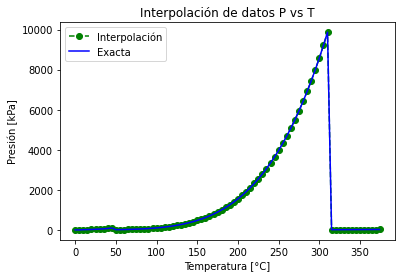

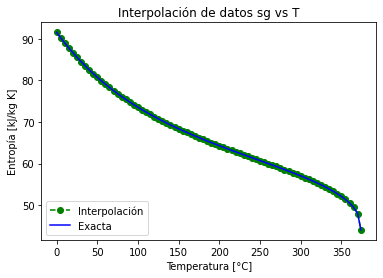

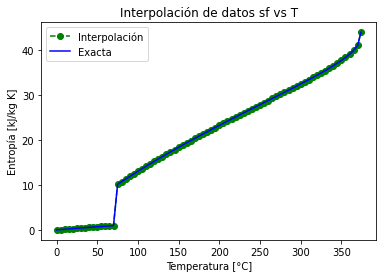

In [18]:
plt.plot(tablaPT[0],tablaPT[1],'go--',label='Interpolación')
plt.plot(T,P,'b',label='Exacta')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Presión [kPa]')
plt.title('Interpolación de datos P vs T')
plt.legend(loc='upper left')
plt.show()

plt.plot(tablaSgT[0],tablaSgT[1],'go--',label='Interpolación')
plt.plot(T,sg,'b',label='Exacta')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Entropía [kJ/kg K]')
plt.title('Interpolación de datos sg vs T')
plt.legend(loc='lower left')
plt.show()

plt.plot(tablaSfT[0],tablaSfT[1],'go--',label='Interpolación')
plt.plot(T,sf,'b',label='Exacta')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Entropía [kJ/kg K]')
plt.title('Interpolación de datos sf vs T')
plt.legend(loc='upper left')
plt.show()